<a href="https://colab.research.google.com/github/Mark12481632/Imperial_MSc_Project/blob/main/code/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Module 2 of the MSc Project.

My research project is intending to use a Graphical Neural Network (GNN) to predict the solubility, in water, of small organic molecules.
<BR><BR>

The purpose of this script is threefold:

1.   Define the dataset for studying the solubility of small organic molecules.
2.   Install and test the Python/Pytorch packages needed for analysing this
     dataset and converting it to a format suitable for GNN ingestion.
3.   Perform analysis on the dataset to ensure it is of sufficient quality.
     I.e. checking for missing values, attribute correlations and that the attributes exhibit expected features.
<BR>

The ESOL dataset: https://moleculenet.org/datasets-1, has been identified as a suitable source of data for this project.  It consists of the measured solubility of 1128 small organic molecules - if this is not enough data to train the GNN I may need to provide additional data but can't know that at this stage.  The information in this dataset will need to be transformed into a format suitable for a GNN - i.e. a graph.
<BR><BR>
The analysis and transformation of the ESOL dataset will require two specific packages:

1.   **RDKit (details:https://www.rdkit.org/docs/index.html)**<BR>
     *Quoting from package description:*<BR>
     The RDKit is an open-source cheminformatics toolkit written in C++ that is also useable from Java or Python. It includes a collection of standard cheminformatics functionality for molecule I/O, substructure searching, chemical reactions, coordinate generation (2D or 3D), and fingerprinting.
2.   **Pytorch-Geometric (details: https://pytorch-geometric.readthedocs.io/en/latest/)**<BR>
     *Quoting from package description:*<BR>
     This is a library built upon PyTorch to help write and train Graph Neural Networks (GNNs) for a wide range of applications related to structured data.

<BR>

This script and the dataset(s) used can be found in the following github repository: https://github.com/Mark12481632/Imperial_MSc_Project.git. Review the "README" file for guidance.
<BR><BR>

This script is comprised of the following sections:
1.   Installation of the required packages.
2.   Loading and examining the ESOL dataset.
3.   RDKit usage
4.   Data validation checks on the ESOL dataset.
5.   Using Pytorch-Geometric to Load ESOL dataset and GNN preperation
6.   Summary.
<BR>

**This script was run in Google's Colab environment.**



---


**Section 1: Installation of the required packages.**

One of the reasons I used Google's Colab for running this script was because I had problems installing RDKit on my Apple PC.  I was lucky enough to find guidance for its installation on Colab on the Internet.
<BR><BR>

As a prerequisite for RDKit Condacolab was needed.

<BR>
NOTE:<BR>
"%%capture" is used to suppress cell output as this can be large.


In [31]:
%%capture

# Install CONDACOLAB
!pip install -q condacolab
import condacolab
condacolab.install()

In [32]:
%%capture

# Install RDKIT
!conda install -c rdkit rdkit

In [33]:
%%capture

# Install pytorch-geometric
!pip install torch_geometric



---


**Section 2: Loading and examining the ESOL dataset**<BR>

- The ESOL dataset has already been downloaded into the github repository - we
  can load it using Pandas.
- Remove the column "ESOL predicted log solubility in mols per litre" as this is the result of another regression model.
<BR><BR>

The column descriptions follow:

1.   **Compound ID:** Name of the compund.
2.   **ESOL predicted log solubility in mols per litre:** Predicted solubility using a regression model - we will remove this.
3.   **Minimum Degree:** The minimum number of bonds that any atom in the molecule has with other atoms.
4.   **Molecular Weight:** The molecular weight of the molecule.
5.   **Number of H-Bond Donors:** A count of the number of hydrogen bond donor groups in the molecule. H-bond donors are atoms (usually hydrogen) that can donate hydrogen bonds to other atoms.
6.   **Number of Rings:** Number of "ring"s, where a "ring" represents a closed cycle of atoms.
7.   **Number of Rotatable Bonds:** A rotatable bond is normally a single bond and that allows the molecule to take on different "forms" by rotation about said bond.
8.   **Polar Surface Area:** Identifies a measure of exposed polar area of a molecule which can provide insights into a molecules polarity.
9.   **measured log solubility in mols per litre:** The logorithm of the solubility of the molecule (in mols/litre)
10.  **smiles:** The SMILES representation of the molecule - see references above.



In [34]:
# 2.1. Load the "ESOL" dataset and show attributes.

import pandas as pd

github_esol_url = "https://raw.githubusercontent.com/Mark12481632/Imperial_MSc_Project/main/chem_data/esol_raw.csv"
esol_data_orig = pd.read_csv(github_esol_url)

# Display sample from data:
esol_data_orig.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [35]:
# 2.2. Remove column "ESOL predicted log solubility in mols per litre"
esol_data = esol_data_orig.copy()
del esol_data['ESOL predicted log solubility in mols per litre']
esol_data.head()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1




---


**Section 3: Using RDKit**

In this section we demonstrate some of the functionality provided by the RDKIT package.
1.   Use RDKit to display molecules in 2D structure
2.   Use RDKit to check for valid molecules.
3.   Use RDKit to determine molecule length.
4.   Use RDKit to search for similar molecule substructures.

NOTE: This is not a tutorial on RDKit but just demonstrating what it can do and how it will be used.



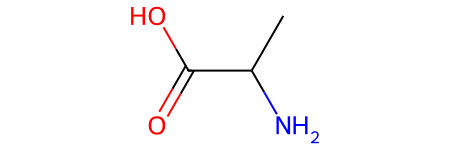

In [36]:
# 3.1. Display molecule in 2D structure

from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d


def draw2D(mol, disp_h=450, disp_w=150):
  """
  This is a simple function that displays a SMILES format molecule
  as a 2D structure
  """
  molSize=(disp_h, disp_w)
  mol_c = Chem.Mol(mol.ToBinary())
  if not mol_c.GetNumConformers():
    rdd.Compute2DCoords(mol_c)
  drawer = draw2d.MolDraw2DSVG(molSize[0], molSize[1])
  drawer.DrawMolecule(mol_c)
  drawer.FinishDrawing()
  svg = drawer.GetDrawingText()
  display(SVG(svg.replace('svg:', '')))


# load an example SMILES molecule
example_molecule = Chem.MolFromSmiles('CC(N)C(=O)O')

# Display molecule
draw2D(example_molecule)

In [37]:
# 3.2. Check invalid molecule.

#   Invalid molecules create a "SMILES Parse Error" as shown below.
#   Also, the object returned for an invalid molecule in None.
invalid_smiles_molecule = 'CO(C)C'                # Such a molecule can't exist
print(Chem.MolFromSmiles(invalid_smiles_molecule))

None


In [38]:
# 3.3. Check valid molecule.

#   Valid molecules create no error messages as shown below.
#   Also, the object returned for a valid molecule in not None.
valid_smiles_molecule = 'O'                   # This is the water molecule.
print(Chem.MolFromSmiles(valid_smiles_molecule))


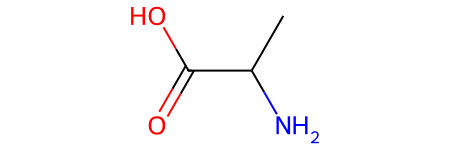

Molecule length: 6


In [39]:
# 3.4. Determine molecule length

# load an example SMILES molecule
example_molecule = Chem.MolFromSmiles('CC(N)C(=O)O')

draw2D(example_molecule)

# Determine number of atoms (=molecule length), excludes H atoms.
print("Molecule length:", example_molecule.GetNumAtoms())

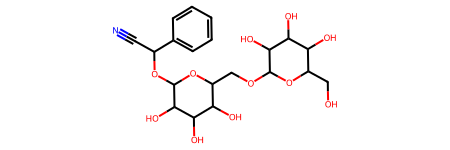

Number matches:7


In [40]:
# 3.5. Substructure searches makes use of SMARTS (ref:https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)
#    a Language for Describing Molecular Patterns.

# We want to seach a molecule to see how many "OH" radicals it has.
OH_search_pattern = Chem.MolFromSmarts('[OH]')
molecule = Chem.MolFromSmiles('OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O')

# Using above function to display the molecule.
draw2D(molecule)

# Should find 7 matches
result = molecule.GetSubstructMatches(OH_search_pattern)
print("Number matches:" + str(len(result)))



---


**Section 4: Data validation checks on the ESOL dataset.**<BR>

Here we perform the usual sanity checks on the data:

*   Check for None (i.e. missing) values and types
*   Examine attributes and any correlations.

The solubility literature informs us that, in a polar medium like water, solubility is affected by two factors:

1.   Molecule length: generally the longer the molecule the less soluble it is.
2.   Polarizing radicals/atoms:  when present cause the hydrocarbon molecule to be polarized and have a greater tendency for solubility.<BR>
In particular we consider the presence of the "OH" radical.


In [41]:
# 4.1. ESOL data already loaded into the Pandas DF: esol_data
#      Check for missing values - and types.

esol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB


In [42]:
# 4.2. Look at correlations:

esol_temp = esol_data[['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings',
                       'Number of Rotatable Bonds', 'Polar Surface Area',
                       'measured log solubility in mols per litre']]

esol_temp.corr()

# As one would expect the "Molecular Weight" and "Number of Rings" are all highly positively correlated - they both
# relate to the "size" of the molecule.
# These 2 attributes have a strong negative correlation to the "measured log solubility in mols per litre".
# This agrees with with the literature (as stated above).
# There is also a very high correlation between "Number of H-Bond Donors" and "Polar Surface Area" (0.756).
# However, the correlation between "Polar Surface Area" and "measured log solubility in mols per litre" is,
# perhaps, surprisingly low (0.123).

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
Minimum Degree,1.000000,-0.096719,-0.130664,0.246020,-0.175626,-0.189464,-0.130445
Molecular Weight,-0.096719,1.000000,0.254877,0.652521,0.396894,0.475440,-0.640189
Number of H-Bond Donors,-0.130664,0.254877,1.000000,0.211087,0.077002,0.755932,0.209429
Number of Rings,0.246020,0.652521,0.211087,1.000000,-0.136654,0.308606,-0.512279
Number of Rotatable Bonds,-0.175626,0.396894,0.077002,-0.136654,1.000000,0.286723,-0.244256
Polar Surface Area,-0.189464,0.475440,0.755932,0.308606,0.286723,1.000000,0.123210
measured log solubility in mols per litre,-0.130445,-0.640189,0.209429,-0.512279,-0.244256,0.123210,1.000000


Text(0.5, 1.0, 'Log Solubility Vs Molecular Weight')

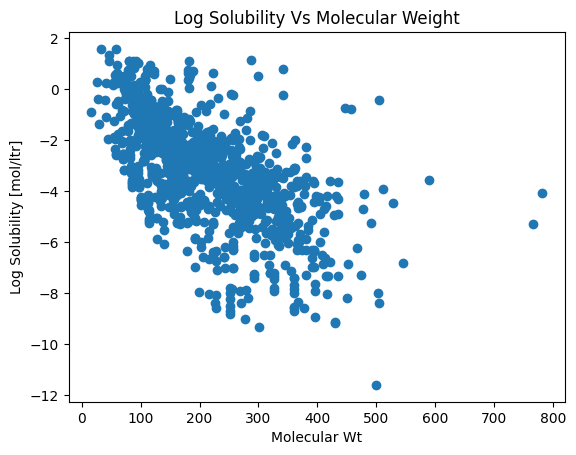

In [43]:
# 4.3. Taking the molecular weight as a proxy for molecular size we can see how (log) solubility
#      varies with molecular size (weight)

import matplotlib.pyplot as plt

plt.scatter(esol_data['Molecular Weight'], esol_data['measured log solubility in mols per litre'])
plt.xlabel('Molecular Wt')
plt.ylabel('Log Solubility [mol/ltr]')
plt.title('Log Solubility Vs Molecular Weight')

# There doesn't appears to be any major outliers.
# But we see a definite tendency for solubility to decrease with increased molecular size (i.e. weight)

Text(0.5, 1.0, 'Log Solubility Vs Molecular Weight')

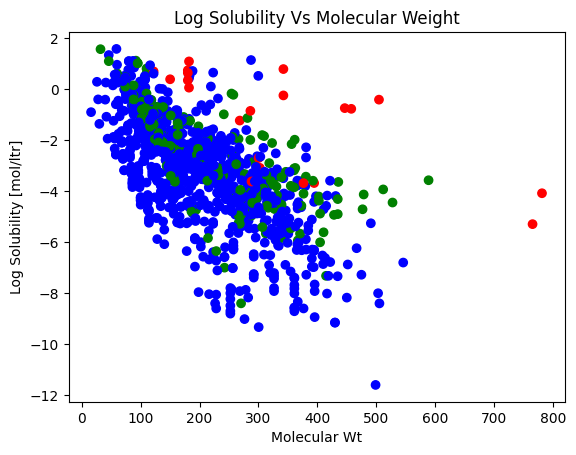

In [44]:
# 4.4. Now we should also factor in the molecules that have radical/polar components.

# Add the attribute "NUM_OH" that counts the number of "OH" radicals in the molecule.
# Here we can use the RDKit to search for "OH" radicals in the molecule.
# 0 => No "OH" radicals present.
# 1 => at most 3 "OH" radicals per molecule.
# 2 => more than 3 "OH" radicals per molecule.

esol_temp = esol_data.copy()
esol_temp['Num_OH'] = esol_temp['smiles'].map(lambda mol: len(Chem.MolFromSmiles(mol).GetSubstructMatches(OH_search_pattern)))
esol_temp['Num_OH'] = esol_temp['Num_OH'].map(lambda x: '0' if x == 0 else '1' if x < 4 else '2')

# DISPLAY:
# Colour defined by number of "OH" radicals per molecule.
# blue  => No "OH" radicals present.
# green => at most 2 "OH" radicals per molecule.
# red   => more than 2 "OH" radicals per molecule.
colors = {'0':'blue', '1':'green', '2':'red'}

plt.scatter(esol_temp['Molecular Weight'],
            esol_temp['measured log solubility in mols per litre'],
            c=esol_temp['Num_OH'].map(colors))
plt.xlabel('Molecular Wt')
plt.ylabel('Log Solubility [mol/ltr]')
plt.title('Log Solubility Vs Molecular Weight')

# We can clearly see that molecules of a given size tend to be more soluble the more "OH"
# radicals they have.  So, the number of "OH" radicals in a molecule, can greatly affect its
# solubility.



---


**Section 5: Using Pytorch-Geometric to Load ESOL dataset and GNN preperation.**
<BR><BR>
The Pytorch-Geometric package provides a function called "MoleculeNet" which
loads the ESOL reference dataset from a reference location.  Guidance for the
use of MoleculeNet can also be found under the Pytorch-Geometric package documentation - the link for which has already been given.

In [45]:
# 5.1 Load the ESOL dataset.
#     Unfortunately, I am unable to get MoleculeNet to load the "ESOL" csv file referenced above
#     (that resides in my GitHub repository) as other meta data is needed.
#     It must download the ESOL file from the "official" source.
#     The "root" defines where the data is downloaded to and "name" defines which dataset
#     is to be referenced - which is ESOL in this case.
#     NOTE: A. The downloaded dataset (CSV file) is saved as "delaney-processed.csv" under the
#              the location: ./chem_data/download/esol/raw.
#           B. The downloaded file is NOT included in GitHub it only resides in Colab.

from torch_geometric.datasets import MoleculeNet

esol = MoleculeNet(root="./chem_data/download", name="ESOL")

In [46]:
# 5.2. Initial analysis of dataset now using pytorch-geometric.
#      Here we can start to extract information from the ESOL dataset in a format
#      that we will use for our GNN - part the ESOL data transformation stage.

# First we can examine the "esol" datastructure
molecule_index = 2
print("1.", esol)
print("2.", esol[molecule_index])
print("3.", esol[molecule_index]['smiles'])
print("4.", esol[molecule_index].x)
print("5.", esol[molecule_index].edge_index.t())
print("6.", esol[molecule_index].y)
print("7.", esol[molecule_index].edge_attr)

# From (1) we see that the ESOL dataset has 1128 entries - this we had already determined.
# From this stage on we are only considering the 3rd entry/molecule in the ESOL dataset.
# From (2) we see all the data attributes available for all molecules.
# From (3) we see the SMILES encoding of the molecule.
# From (4) This contains node informtaion for the molecle.
#.         1 row for each node of the graph - so 11 nodes in this case
#          Each node has 9 attributes:
#             - Atomic Number
#             - Chirality
#             - Formal Charge : relates to valency electrons for the atom
#             - Hybridization : indicates spatioal arrangement of atom's orbitals.
#             - Is Aromatic : (binary) is part of aromatic system.
#             - Is H-Bond Donor: (binary) indicates if atom can at as hydrogen bond donor.
#             - Is H-Bond Acceptor: (binary) indicates if atom can at as hydrogen bond acceptor
#             - Is In Ring: (binary) atom is in ring structure.
#             - Atomic Mass
# From (5) This contains edge information for each molecule.
#          An edge defines a link to a neighbouring node.
#          It is a list for of the adjacency matrix.
# From (6) we have the label value - the target value - for the ESOL dataset.
#          Which in this case is the log solubility value.
# From (7) Edge features provide attributes for the edges - e.g. number of bonds.

# *************
# It should be noted that on further analysis that the "edge_attr" data should not
# be used for ESOL.
# *************

1. ESOL(1128)
2. Data(x=[11, 9], edge_index=[2, 20], edge_attr=[20, 3], smiles='CC(C)=CCCC(C)=CC(=O)', y=[1, 1])
3. CC(C)=CCCC(C)=CC(=O)
4. tensor([[6, 0, 4, 5, 3, 0, 4, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 0, 0],
        [6, 0, 4, 5, 3, 0, 4, 0, 0],
        [6, 0, 3, 5, 1, 0, 3, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 0, 0],
        [6, 0, 4, 5, 3, 0, 4, 0, 0],
        [6, 0, 3, 5, 1, 0, 3, 0, 0],
        [6, 0, 3, 5, 1, 0, 3, 0, 0],
        [8, 0, 1, 5, 0, 0, 3, 0, 0]])
5. tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 2,  1],
        [ 3,  1],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 6,  8],
        [ 7,  6],
        [ 8,  6],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [10,  9]])
6. tensor([[-2.0600]])
7. tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
     



---


**Section 6: Summary**<BR>

The ESOL dataset, which is part of the Pytorch-Geometric package, provides a suitbale dataset on which to train a Graphical Neural Netork for predicting the solubility of small organic molecules.  This dataset will need to undergo some transformation(s) before it is suitable for ingestion by a GNN.<BR>
The ESOL dataset has 1128 distinct molecule tapes with eight attributes per molecule.  There were no mising values and there were no major outliers that needed to be accounted for.
<BR><BR>
The key packages that are needed to analyse and transform the ESOL dataset, i.e. RDKit and torch-geometric, were able to be installed and their functionality tested.
<BR><BR>
Further analysis of the ESOL dataset proved that the general "rules of thumb" that (1) solubility of organic compounds decresaes with increased molecule size, and (2) OH radical groups incresae solubility both hold true - at least for small organic molecules.
<BR><BR>
Using the MoleculeNet function from the Pytorch-geometric package it was possible to extract the "graphical" atttribues of the organic molecules in the ESOL dataset.
<BR><BR>
The ESOL dataset has a column that provides the "predicted" log solubility of each organic molecule based on a regression model .  Our aim should be to improve on that predictive model.
<BR><BR>
One concern is that there may not be enough data in the ESOL dataset to adequately train a GNN - ESOL only has 1128 instances of small organic molecules.